<a href="https://colab.research.google.com/github/zoetice/data-science/blob/main/Zoe_TiceU2proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**How often will Taylor Swift appear in Spotify's top ten most streamed artists in any given month?**

Context:

Spotify Charts showcase the top artists streamed each month on their app. Unrelated to other charts like monthly listeners and top songs, top artists is based on streams pure artist. To be in the top ten in any given month shows that you are either very popular, or you may have just has a release.

Prior:

Taylor Swift is a farely popular artist with many different songs that people can stream, so I would guess that she would be in the top 10 streamed artists each month majority of the time, around 60%. Since the prior is only a guess, I'm going to set it at 3:2, so it doesn't overly effect the posterior.

<Axes: >

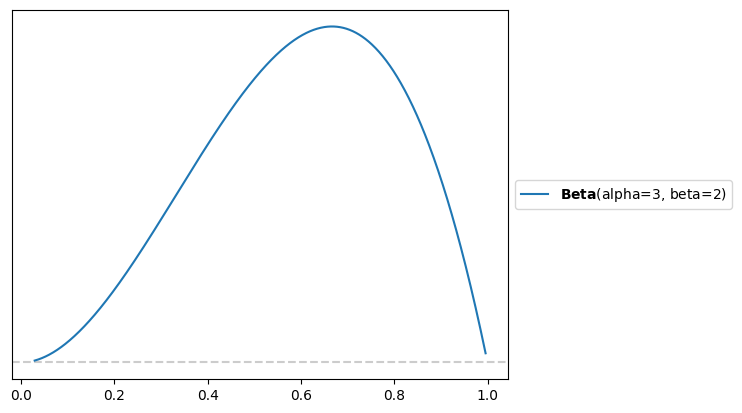

In [ ]:
pz.Beta(alpha=3,beta=2).plot_pdf()

Likelihood:

The likelihood data came from stats of Spotify's top streamed artists each month off the website tophit. The data was taken from January 2023 to August 2025.

DATA:

I chose this data because it is something that I am interested in that had many prior examples to showcase the likelyhood. There are many ways to track an artist like Taylor Swift's popularity, comparing streams to others is just one of them, and monthly spotify streams ranking seemed to be a good stat to focus on.

In [ ]:
!pip install preliz

In [ ]:
import preliz as pz

In [ ]:
import numpy as np
import arviz as az
import pymc as pm

In [ ]:
FT_data_2324 = np.repeat([1,0], repeats = [18,13])

In [ ]:
with pm.Model() as wmby_FT_2324_model:
  θ = pm.Beta('θ' , alpha = 3. , beta = 2.)
  y = pm.Bernoulli('y', p = θ, observed = FT_data_2324)
  idata_FT_2324 = pm.sample(2000)

<Axes: title={'center': 'θ'}>

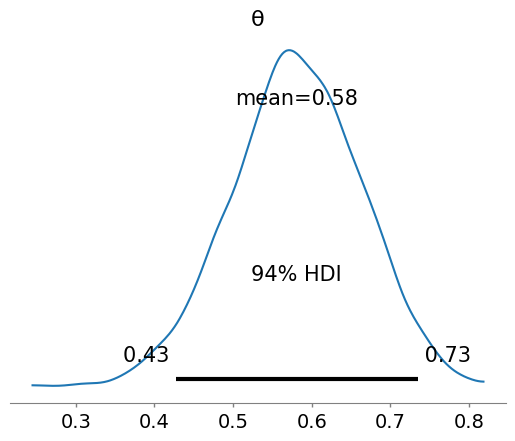

In [ ]:
az.plot_posterior(idata_FT_2324)

In [ ]:
pm.sample_posterior_predictive(idata_FT_2324, model=wmby_FT_2324_model, extend_inferencedata=True)

In [ ]:
stacked_FT_2324 = az.extract(idata_FT_2324, group="posterior_predictive")

In [ ]:
stacked_FT_2324.sel(sample=0).sel(draw=0).y.to_series().values

array([0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1])

Conclusion:

My guess was pretty accurate, with a difference of .02. Although the code matched my guess, it is still probably not accurate as whether or not Taylor Swift is in the top ten artists streamed each month on Spotify is heavily effected by what month it is. During a release and the couple of months after she will almost always be in the top ten, if not number 1, and the same goes for when she is touring. Since no one can predict when these things will happen, and the code doesn't take those things into account, the answer probably isn't accurate.